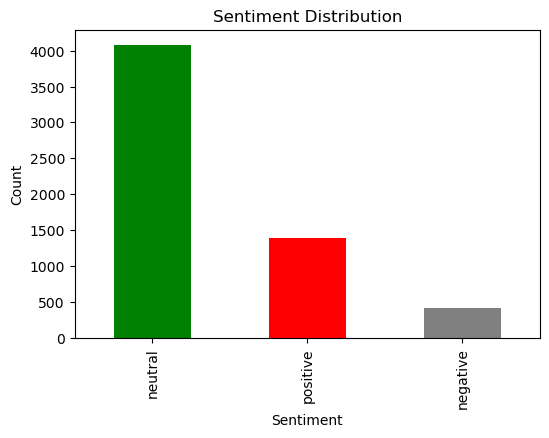

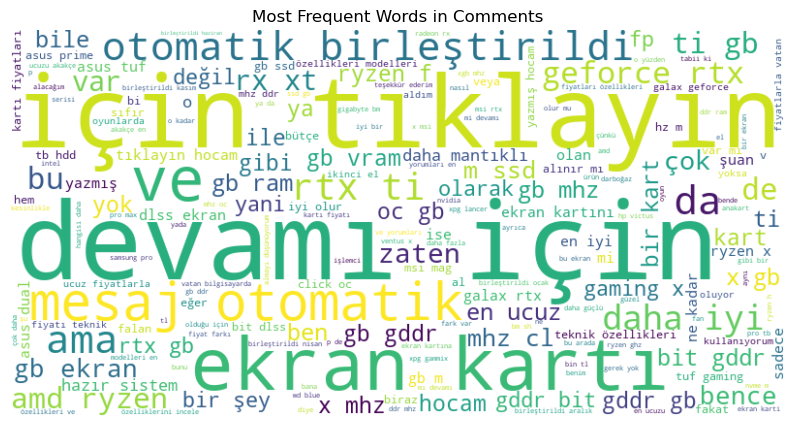

Yorum analizi tamamlandı ve veri seti kaydedildi!


In [1]:
import pandas as pd
from collections import Counter
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Veri setini yükleme ve temizleme
data_cleaned = pd.read_csv("All_Scrapping_Cleaned_Tokenized_StopWord_lemmatized.csv")
data_cleaned = data_cleaned.dropna(subset=['Yorum Temiz']).reset_index(drop=True)

# Basit kelime listeleriyle duygu analizi
def sentiment_analysis(comment):
    positive_words = ["iyi", "güzel", "harika", "mükemmel", "beğendim", "olumlu", "memnun", "mükemmel", "harikulade", "sevdim", "şahane", "kaliteli", "etkileyici", "kusursuz"]
    negative_words = ["kötü", "berbat", "korkunç", "beğenmedim", "olumsuz", "şikayet", "problem", "sorun", "fena", "rezalet", "vasat", "hayal kırıklığı", "berbat", "felaket", "pişmanlık"]

    tokens = comment.split()
    positive_count = sum(1 for word in tokens if word in positive_words)
    negative_count = sum(1 for word in tokens if word in negative_words)

    if positive_count > negative_count:
        return "positive"
    elif negative_count > positive_count:
        return "negative"
    else:
        return "neutral"

# Yorumlara duygu analizi uygulama
data_cleaned['sentiment'] = data_cleaned['Yorum Temiz'].apply(sentiment_analysis)

# Duygu dağılımı görselleştirme
sentiment_distribution = data_cleaned['sentiment'].value_counts()
plt.figure(figsize=(6, 4))
sentiment_distribution.plot(kind='bar', color=['green', 'red', 'gray'])
plt.title("Sentiment Distribution")
plt.xlabel("Sentiment")
plt.ylabel("Count")
plt.show()

# Kelime bulutu görselleştirme
all_comments = ' '.join(data_cleaned['Yorum Temiz'].tolist())
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_comments)
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Most Frequent Words in Comments")
plt.show()

# Yeni veri setini kaydetme
data_cleaned.to_csv("sentiment_analysis_results.csv", index=False)
print("Yorum analizi tamamlandı ve veri seti kaydedildi!")
